In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Erdos Renyi Random Graph : 

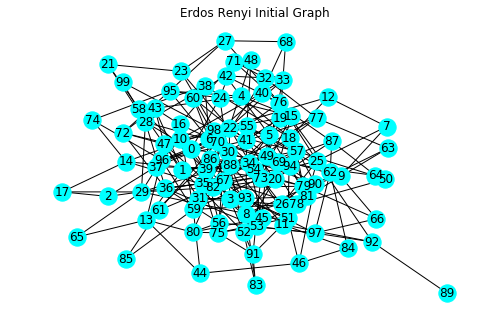

In [93]:
# Network Definition
erg = nx.erdos_renyi_graph(100,0.05)
nx.draw(erg,node_color = 'cyan',with_labels=True )
plt.title('Erdos Renyi Initial Graph')
plt.show()


In [94]:
# Model Selection
import ndlib.models.epidemics.SISModel as sis
sis_model = sis.SISModel(erg)


In [95]:
# Configurations to the Model
import ndlib.models.ModelConfig as mc

config = mc.Configuration()
config.add_model_parameter('beta', 0.002083)
config.add_model_parameter('lambda', 0.002083)
config.add_model_parameter("percentage_infected", 0.01)



In [96]:
# SIS Model intialization
sis_model.set_initial_status(config)


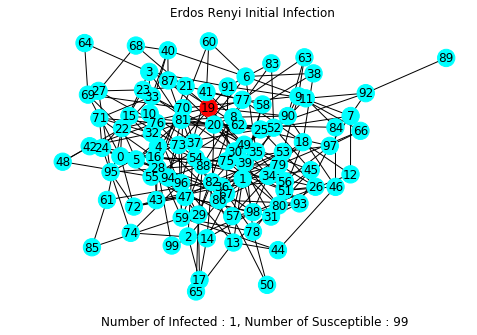

In [97]:
color_map = []
Infected = 0
Susceptible = 0
for patch in list(erg.node):
    if patch in sis_model.status:
        if sis_model.status[patch] == 1:
            color_map.append('red')
            Infected += 1
        else: 
            color_map.append('cyan')
            Susceptible += 1
            
nx.draw(erg ,node_color = color_map, with_labels = True)
plt.title('Erdos Renyi Initial Infection ')
txt="Number of Infected : " + str(Infected) + ", Number of Susceptible : " + str(Susceptible)
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [98]:
iterations = sis_model.iteration_bunch(500)
trends = sis_model.build_trends(iterations)

In [99]:
color_map = []
Infected = 0
Susceptible = 0
for patch in list(erg.node):
    if patch in sis_model.status:
        if sis_model.status[patch] == 1:
            color_map.append('red')
            Infected += 1
        else: 
            color_map.append('cyan')
            Susceptible +=1

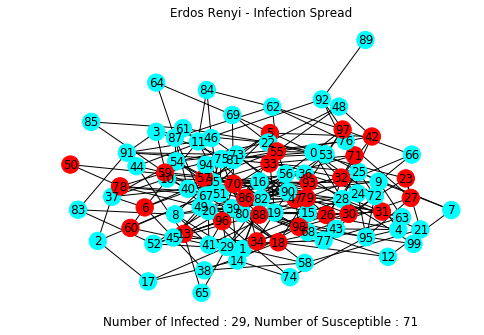

In [101]:
nx.draw(erg ,node_color = color_map, with_labels = True)
plt.title('Erdos Renyi - Infection Spread')
txt="Number of Infected : " + str(Infected) + ", Number of Susceptible : " + str(Susceptible)
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [102]:
# Diffusion Spread 
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.MultiPlot import MultiPlot

viz = DiffusionTrend(sis_model, trends)
p = viz.plot(width=400, height=400)
show(p)

# Barabashi Random Graph ( Prefential Attachment Network): 

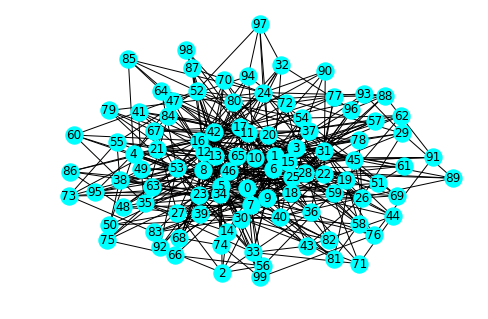

In [103]:
brg = nx.barabasi_albert_graph(100, 5)
nx.draw(brg, node_color = 'cyan', with_labels = True)

In [104]:
# Model Selection
sis_model_bag = sis.SISModel(brg)

In [105]:
# Model Configurations 
config = mc.Configuration()
config.add_model_parameter('beta', 0.002083)
config.add_model_parameter('lambda', 0.002083)
config.add_model_parameter("percentage_infected", 0.01)

In [106]:
# SIS Model intialization
sis_model_bag.set_initial_status(config)

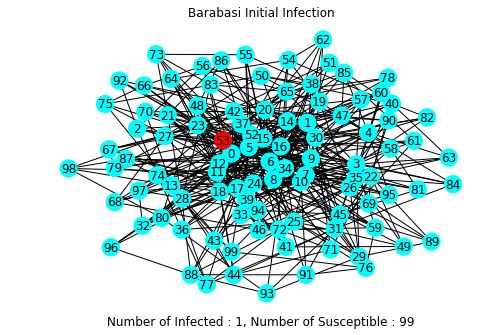

In [107]:
color_map = []
Infected = 0
Susceptible = 0
for patch in list(brg.node):
    if patch in sis_model_bag.status:
        if sis_model_bag.status[patch] == 1:
            Infected +=1 
            color_map.append('red')
        else: 
            color_map.append('cyan')
            Susceptible +=1
            
nx.draw(brg ,node_color = color_map, with_labels = True)
plt.title("Barabasi Initial Infection")
txt="Number of Infected : " + str(Infected) + ", Number of Susceptible : " + str(Susceptible)
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [108]:
iterations = sis_model_bag.iteration_bunch(500)
trends = sis_model_bag.build_trends(iterations)

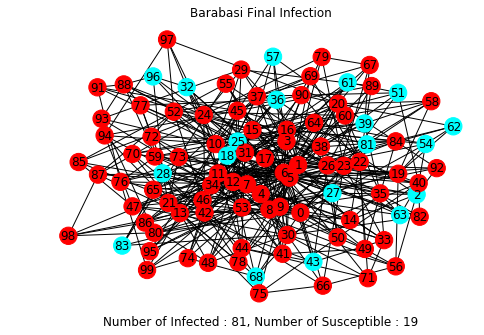

In [109]:
color_map = []
Infected = 0
Susceptible = 0
for patch in list(brg.node):
    if patch in sis_model_bag.status:
        if sis_model_bag.status[patch] == 1:
            color_map.append('red')
            Infected +=1
        else: 
            color_map.append('cyan')
            Susceptible +=1

nx.draw(brg ,node_color = color_map, with_labels = True)
plt.title("Barabasi Final Infection")
txt="Number of Infected : " + str(Infected) + ", Number of Susceptible : " + str(Susceptible)
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [139]:
# Diffusion Spread 
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.MultiPlot import MultiPlot

viz = DiffusionTrend(sis_model_bag, trends)
show(viz.plot(width=400, height=400))
#show(p)

# Small World Network (Watts Strogatz Model)

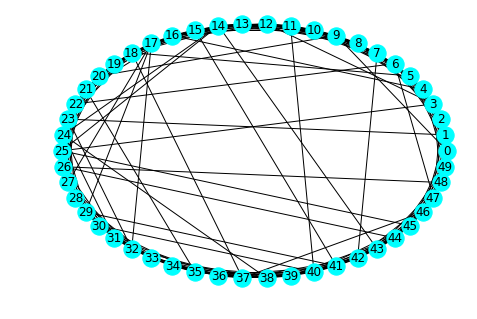

In [45]:
watts_strogatz = nx.watts_strogatz_graph(50,10,0.1,)
nx.draw_circular(watts_strogatz,node_color = 'cyan',with_labels=True, seed = 543)
plt.show()

C:\Users\Hitesh_Bahar\Anaconda3\envs\python36\lib\site-packages\ndlib\models\DiffusionModel.py:161: UserWarning: Graph with less than 100 nodes: a single node will be set as infected
  warnings.warn('Graph with less than 100 nodes: a single node will be set as infected')


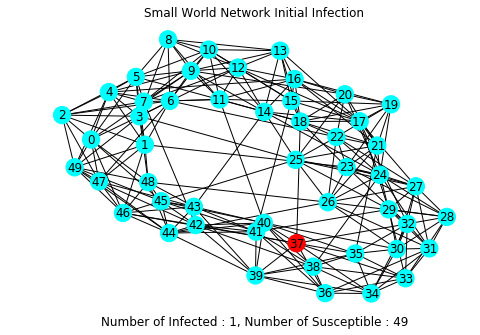

In [46]:
# Model Selection
sis_model_sw = sis.SISModel(watts_strogatz)
# Model Configurations 
config = mc.Configuration()
config.add_model_parameter('beta', 0.002083)
config.add_model_parameter('lambda', 0.002083)
config.add_model_parameter("percentage_infected", 0.01)

# SIS Model intialization
sis_model_sw.set_initial_status(config)

color_map = []
Infected = 0
Susceptible = 0
for patch in list(watts_strogatz.node):
    if patch in sis_model_sw.status:
        if sis_model_sw.status[patch] == 1:
            color_map.append('red')
            Infected +=1
        else: 
            color_map.append('cyan')
            Susceptible +=1
            
nx.draw(watts_strogatz ,node_color = color_map, with_labels = True)
plt.title("Small World Network Initial Infection")
txt="Number of Infected : " + str(Infected) + ", Number of Susceptible : " + str(Susceptible)
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [47]:
iterations = sis_model_sw.iteration_bunch(500)
trends = sis_model_sw.build_trends(iterations)

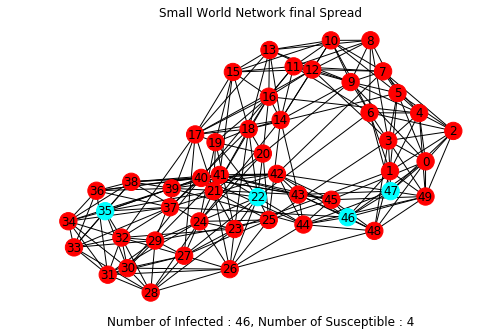

In [48]:
color_map = []
Infected = 0
Susceptible = 0
for patch in list(watts_strogatz.node):
    if patch in sis_model_sw.status:
        if sis_model_sw.status[patch] == 1:
            color_map.append('red')
            Infected +=1
        else: 
            color_map.append('cyan')
            Susceptible +=1

nx.draw(watts_strogatz ,node_color = color_map, with_labels = True)
plt.title("Small World Network final Spread")
txt="Number of Infected : " + str(Infected) + ", Number of Susceptible : " + str(Susceptible)
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [49]:
# Diffusion Spread 
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.MultiPlot import MultiPlot

viz = DiffusionTrend(sis_model_sw, trends)
show(viz.plot(width=400, height=400))
#show(p)